In [9]:
!apt install valgrind
!rm -rf supercomp
!rm -rf 04-profiling
!git clone --depth 1 --branch master --no-checkout https://github.com/matheus-1618/supercomp.git
!cd supercomp&&git sparse-checkout set material/aulas/04-profiling/
!cd supercomp&&git checkout master
!mv supercomp/material/aulas/04-profiling//* .
!rm -rf supercomp

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
valgrind is already the newest version (1:3.18.1-1ubuntu2).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.
Cloning into 'supercomp'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (197/197), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 197 (delta 4), reused 144 (delta 3), pack-reused 0
Receiving objects: 100% (197/197), 26.19 MiB | 23.45 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Already on 'master'
Your branch is up to date with 'origin/master'.


In [21]:
%%writefile warmup.cpp
#include<iostream>
#include<algorithm>
using namespace std;

constexpr int M = 2048;
constexpr int N = 2048;

double naive_sum(const double a[][N]){
    double sum = 0.0;
    for(int j = 0; j < N; ++j) {
        for(int i = 0; i < M; ++i)
            sum += a[i][j];
    }
    return sum;
}

double improved_sum(const double a[][N]) {
    double sum = 0.0;
    for(int i = 0; i < M; ++i)
        for(int j = 0; j < N; ++j)
            sum +=a[i][j];
    return sum;
}

int main() {
    static double a[M][N];
    fill_n(&a[0][0], M*N, 1.0 / (M*N));
    cout << naive_sum(a) << endl;
    static double b[M][N];
    fill_n(&b[0][0], M*N, 1.0 / (M*N));
    cout << improved_sum(b) << endl;
    return 0;
}

Overwriting warmup.cpp


In [31]:
!g++ -Wall -g -O3 warmup.cpp -o warmup


In [32]:
!valgrind --tool=callgrind ./warmup

==9753== Callgrind, a call-graph generating cache profiler
==9753== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==9753== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==9753== Command: ./warmup
==9753== 
==9753== For interactive control, run 'callgrind_control -h'.
1
1
==9753== 
==9753== Events    : Ir
==9753== Collected : 50581246
==9753== 
==9753== I   refs:      50,581,246


In [33]:
!callgrind_annotate callgrind.out.9753 warmup.cpp

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.9753' (creator: callgrind-3.18.1)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 10864276
Trigger: Program termination
Profiled target:  ./warmup (PID 9753, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   warmup.cpp
Auto-annotation:  on

--------------------------------------------------------------------------------
Ir                  
--------------------------------------------------------------------------------
50,581,246 (100.0%)  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir                   file:function
--------------------------------------------------------------------------------
31,475,723 (62.23%)  warmup.cpp:main [/content/warmup]
1

In [19]:
!apt-get install graphviz
!pip install gprof2dot

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
graphviz is already the newest version (2.42.2-6).
0 upgraded, 0 newly installed, 0 to remove and 16 not upgraded.


In [35]:
%%writefile profile.cpp
#include <iostream>
#include <cmath>
#include <chrono>

void heavyCalculation() {
    for (int i = 0; i < 100000; ++i) {
        double result = std::sqrt(static_cast<double>(i));
    }
}

void intermediateFunction() {
    for (int i = 0; i < 1000; ++i) {
        heavyCalculation();
    }
}

void mainFunction() {
    for (int i = 0; i < 5; ++i) {
        intermediateFunction();
    }
}

int main() {
    auto start = std::chrono::high_resolution_clock::now();

    mainFunction();

    auto end = std::chrono::high_resolution_clock::now();
    auto duration = std::chrono::duration_cast<std::chrono::milliseconds>(end - start);

    std::cout << "Time taken: " << duration.count() << " milliseconds" << std::endl;

    return 0;
}

Writing profile.cpp


In [36]:
!g++ -Wall -O0 -g profile.cpp -o profile

profile.cpp: In function ‘void heavyCalculation()’:
profile.cpp:7:16: warning: unused variable ‘result’ []8;;https://gcc.gnu.org/onlinedocs/gcc/Warning-Options.html#index-Wunused-variable-Wunused-variable]8;;]
    7 |         double result = std::sqrt(static_cast<double>(i));
      |                ^~~~~~


In [37]:
!valgrind --tool=callgrind ./profile

==10163== Callgrind, a call-graph generating cache profiler
==10163== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==10163== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==10163== Command: ./profile
==10163== 
==10163== For interactive control, run 'callgrind_control -h'.
Time taken: 256080 milliseconds
==10163== 
==10163== Events    : Ir
==10163== Collected : 10002410933
==10163== 
==10163== I   refs:      10,002,410,933


In [50]:
!gprof2dot  -n0 -e0 -f callgrind callgrind.out.10163 | dot -Tsvg -o output.svg

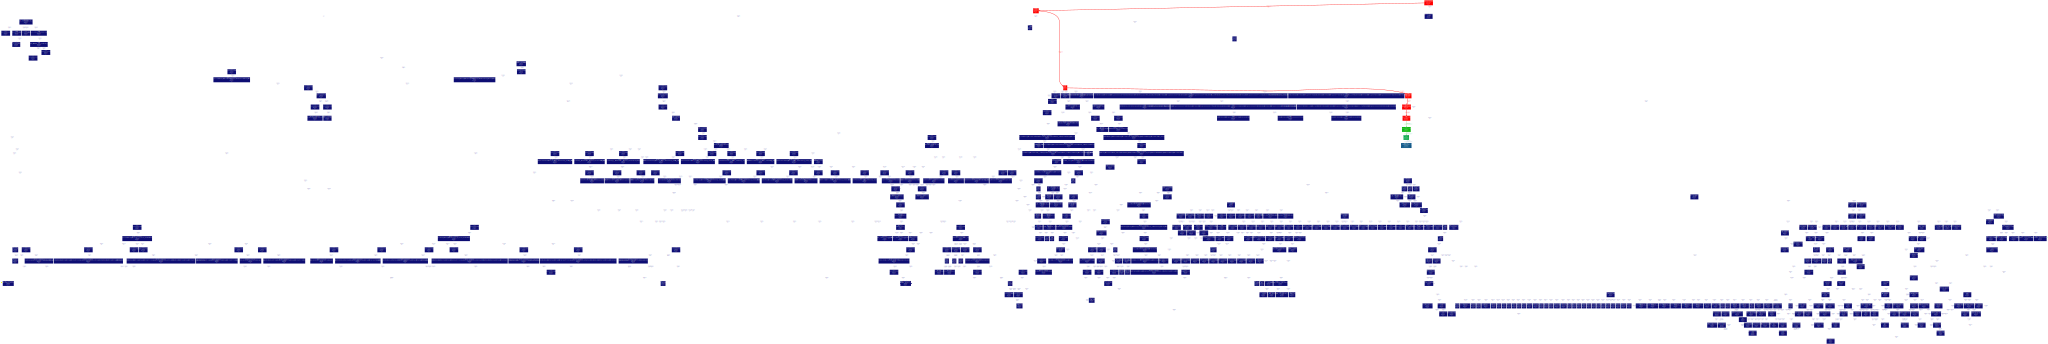

In [51]:
from IPython.display import SVG, display
def show_svg():
    display(SVG('output.svg'))
show_svg()

In [52]:
!gprof2dot  -n0.1 -f callgrind callgrind.out.10163 | dot -Tsvg -o output.svg

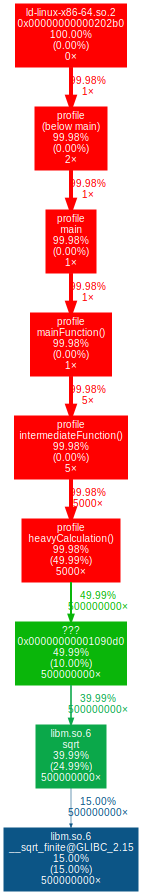

In [53]:
from IPython.display import SVG, display
def show_svg():
    display(SVG('output.svg'))
show_svg()

In [54]:
!g++ -g euclides-ingenuo.cpp -o euclides-ingenuo

In [56]:
!rm -rf supercomp
!rm -rf 02-03-implementacao-c++
!git clone --depth 1 --branch master --no-checkout https://github.com/matheus-1618/supercomp.git
!cd supercomp&&git sparse-checkout set material/aulas/02-03-implementacao-c++/
!cd supercomp&&git checkout master
!mv supercomp/material/aulas/02-03-implementacao-c++//* .
!rm -rf supercomp

Cloning into 'supercomp'...
remote: Enumerating objects: 197, done.
remote: Counting objects: 100% (197/197), done.
remote: Compressing objects: 100% (157/157), done.
remote: Total 197 (delta 4), reused 144 (delta 3), pack-reused 0
Receiving objects: 100% (197/197), 26.19 MiB | 26.27 MiB/s, done.
Resolving deltas: 100% (4/4), done.
Already on 'master'
Your branch is up to date with 'origin/master'.


In [65]:
!(echo 5 | python t4.py) > entrada.txt

0.403056556 0.035896497


In [67]:
!valgrind --tool=callgrind ./euclides-ingenuo < t6-in-1.txt > t6-out-1.txt

==16870== Callgrind, a call-graph generating cache profiler
==16870== Copyright (C) 2002-2017, and GNU GPL'd, by Josef Weidendorfer et al.
==16870== Using Valgrind-3.18.1 and LibVEX; rerun with -h for copyright info
==16870== Command: ./euclides-ingenuo
==16870== 
==16870== For interactive control, run 'callgrind_control -h'.
==16870== 
==16870== Events    : Ir
==16870== Collected : 2556688
==16870== 
==16870== I   refs:      2,556,688


In [68]:
!kcachegrind callgrind.out.16870

/bin/bash: line 1: kcachegrind: command not found


In [69]:
!gprof2dot  -n0.1 -f callgrind callgrind.out.16870 | dot -Tsvg -o output.svg

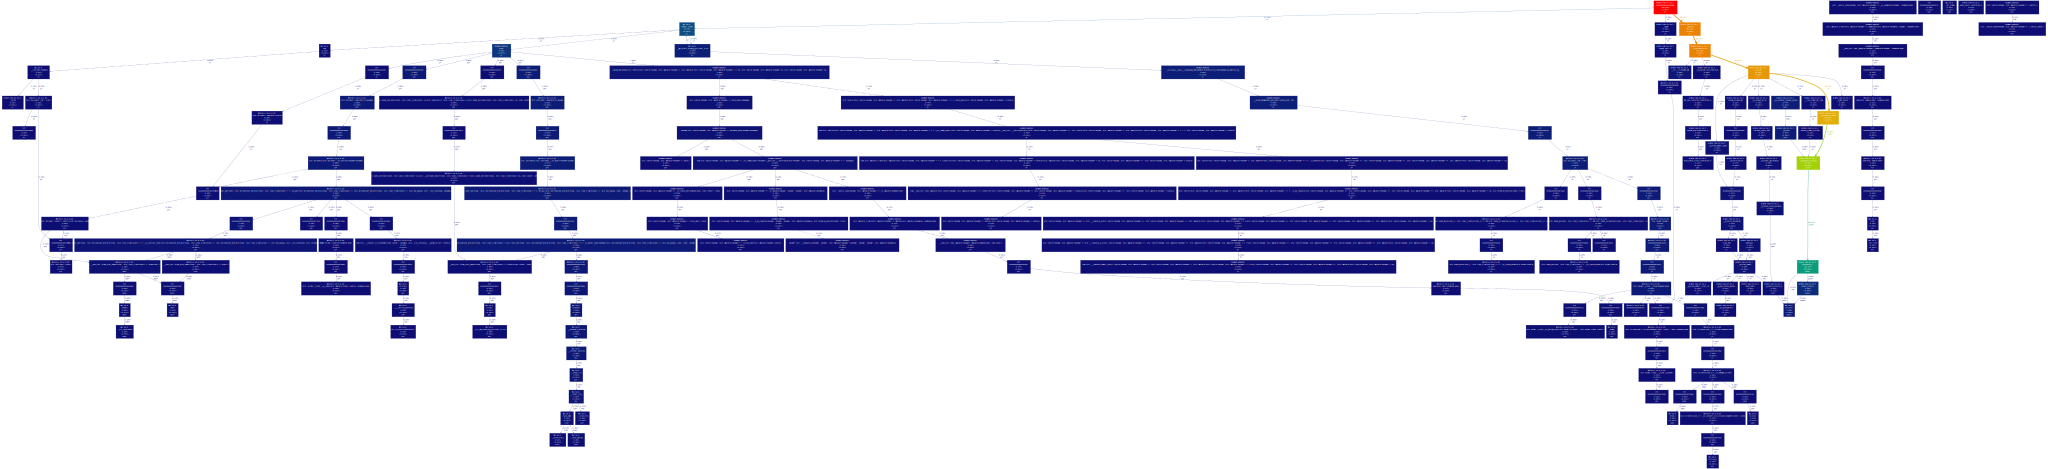

In [70]:
from IPython.display import SVG, display
def show_svg():
    display(SVG('output.svg'))
show_svg()

In [71]:
!callgrind_annotate callgrind.out.16870 euclides-ingenuo.cpp

--------------------------------------------------------------------------------
Profile data file 'callgrind.out.16870' (creator: callgrind-3.18.1)
--------------------------------------------------------------------------------
I1 cache: 
D1 cache: 
LL cache: 
Timerange: Basic block 0 - 418312
Trigger: Program termination
Profiled target:  ./euclides-ingenuo (PID 16870, part 1)
Events recorded:  Ir
Events shown:     Ir
Event sort order: Ir
Thresholds:       99
Include dirs:     
User annotated:   euclides-ingenuo.cpp
Auto-annotation:  on

--------------------------------------------------------------------------------
Ir                 
--------------------------------------------------------------------------------
2,556,688 (100.0%)  PROGRAM TOTALS

--------------------------------------------------------------------------------
Ir                file:function
--------------------------------------------------------------------------------
985,426 (38.54%)  ./elf/./elf/dl-lookup.c